CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: <!-- Your answers goes here -->
The difference between the two datasets is in the number of data points.
Train_1 and Valid_1 have 6769 and 1693 entries each. Whereas, Train_2 and Valid_2 have 28934 and 7234 entries. 
We can also see that when the model is trained on the first set, the validation accuracy reached is 70%, while when we trained the model on the second set, validation accuracy of 87% was reached.
Train1 and Valid1 have less number of missing values i.e. 5000 and 1300. Train2 and Valid 2 have more missing values, aroung 24000 and 6000.
Also, Train2 only has a value in duration as 0.


### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Features with continuous numeric values are:
age,     
balance, 
day,     
duration,
campaign,
pdays,   
previous

2.   The categorical features did not have numerical values.
The categorical features can be divided into two parts,
One which had only binary data i.e. yes/ no .This can be replaced as follows: 1 for 'yes' and 0 for 'no' respectively.
For a variable which had more than 2 types of categories, we can do one hot encoding.For categorical variables where any relationship does exists, i.e. ordering does not exists, new binary variable is added for each unique value in that feature. That column is split into the number of unique values of that particular column having 1 when the value of that feature equals to that category, and having 0 for every other value.
These features are:
job,      
marital,  
education,
default,  
housing,  
loan,     
contact,  
month,    
poutcome, 
y        

3.   pdays is the only column with missing values where -1 represents a missing value in the dataset. 'pdays' means the number of days that passed by after the client was last contacted from a previous campaign. Here the missing value(-1) is replaced by a very large value. It means that the client was contacted indefinitely long time ago. Since, we cannot define infinite in programming,  replacing it with 9999 seemed like a fairly long time back.
Other options include:
Statistical methods: 
First: In this we replace Missing values with the mean or median of rest of the values. 
Second: replace with the least frequent measure or the most frequent measure. 
Third: Replace in proportionate amount with the least frequent and the most frequent. 
Fourth: Remove that row all together. But since most of the rows in our data had the missing value, choosing this options meant removing more than half of the dataset.
Fifth: We can know the meaning of what the column represents, and then replace those with appropriate values.



In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('mode.chained_assignment',None)

def preprocessing(data):


    
    X=data.iloc[:,:len(data.columns)-1]
    Y=data.iloc[:,-1]
    
    Y=Y.replace(['no','yes'],[0,1])
    
    X_integer=data.select_dtypes(include=['integer'])
    X_object=data.select_dtypes(include=['object'])
    X_object=X_object.iloc[:,:len(X_object.columns)-1]
    list1=[]
    list2=[]
    list3=[]
    X_integer['pdays']=X_integer['pdays'].replace(-1,9999)
    for i in X_integer.columns:
        X_integer[i]=(X_integer[i]-X_integer[i].mean(axis=0))/X_integer[i].std(axis=0)
    
    
    
    for i in X_object.columns:
        if X_object[i].unique().all() in ['yes','no']:
            X_object[i]=X_object[i].replace(['no','yes'],[0,1])
        else:
            list1=X_object[i].unique()
            list2=[i for i in range(1,len(list1)+1)]
            list3=[]
            for k in list2:
                n=k
                length=len(list1)
                pre=[0]*(n-1)
                trail=[0]*(length-n)
                temp=pre+[1]+trail
                list3.append(str(temp).strip('[]'))
            X_object[i]=X_object[i].replace(list1,list3)
            X_object=X_object.join(X_object[i].str.split(',', expand=True).add_prefix(i).fillna(np.nan))
            X_object=X_object.drop(columns=[i])
    
    X=pd.concat([X_integer,X_object],axis=1)    
    return X,Y                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # PROBLEM 1, TASK 1 CODE GOES HERE

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

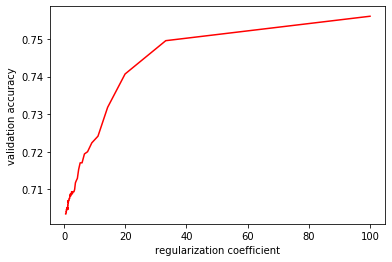

validation accuracy for train1 0.8203575121879155
validation accuracy for valid1 0.7560543414057885
validation accuracy for test 0.7321685281433152


In [40]:
# PROBLEM 1, TASK 2 CODE GOES HERE

X,Y=preprocessing(pd.read_csv("train_1.csv"))

X2,Y2=preprocessing(pd.read_csv("valid_1.csv"))  
                  
X3,Y3=preprocessing(pd.read_csv("test.csv"))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

min_error=9999
best_lambda=0
plt.xlabel('regularization coefficient')
plt.ylabel('validation accuracy')
arrx=[]
arry=[]
for i in np.linspace(0.01,2,100):
    LR = LogisticRegression(penalty='l2',C=i,solver='lbfgs',max_iter=500)
    LR.fit(X,Y)
    Y_pred_valid=LR.predict(X2)
    Error_Validation=log_loss(Y2,Y_pred_valid)
    Accuracy_Validation=accuracy_score(Y2,Y_pred_valid)
    arrx.append(1/i)
    arry.append(Accuracy_Validation)
#    plt.plot(1/i,Accuracy_Validation,color='red')

    if Error_Validation<min_error:
        min_error=Error_Validation
        best_lambda_inverse=i
plt.plot(arrx,arry,color='red')
plt.show()

#train1
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X)
Error_Testing=log_loss(Y,Y_pred_test)
Accuracy_Validation=accuracy_score(Y,Y_pred_test)
print('validation accuracy for train1',Accuracy_Validation)


#valid1
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X2)
Error_Testing=log_loss(Y2,Y_pred_test)
Accuracy_Validation=accuracy_score(Y2,Y_pred_test)
print('validation accuracy for valid1',Accuracy_Validation)

#test
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X3)
Error_Testing=log_loss(Y3,Y_pred_test)
Accuracy_Validation=accuracy_score(Y3,Y_pred_test)
print('validation accuracy for test',Accuracy_Validation)

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

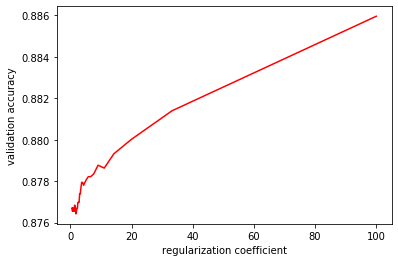

validation accuracy for train2 0.8999101403193475
validation accuracy for valid2 0.8859552115012441
validation accuracy for test 0.8872055733716687


In [39]:
# PROBLEM 1, TASK 3 CODE GOES HERE

X,Y=preprocessing(pd.read_csv("train_2.csv"))

X2,Y2=preprocessing(pd.read_csv("valid_2.csv"))  
                  
X3,Y3=preprocessing(pd.read_csv("test.csv"))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

min_error=9999
best_lambda=0
arrx=[]
arry=[]
plt.xlabel('regularization coefficient')
plt.ylabel('validation accuracy')
for i in np.linspace(0.01,2,100):
    LR = LogisticRegression(penalty='l2',C=i,solver='lbfgs',max_iter=500)
    LR.fit(X,Y)
    Y_pred_valid=LR.predict(X2)
    Error_Validation=log_loss(Y2,Y_pred_valid)
    Accuracy_Validation=accuracy_score(Y2,Y_pred_valid)
    arrx.append(1/i)
    arry.append(Accuracy_Validation)
#    plt.scatter(1/i,Accuracy_Validation,color='red')
    if Error_Validation<min_error:
        min_error=Error_Validation
        best_lambda_inverse=i
plt.plot(arrx,arry,color='red')
plt.show()

#train2
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X)
Error_Testing=log_loss(Y,Y_pred_test)
Accuracy_Validation=accuracy_score(Y,Y_pred_test)
print('validation accuracy for train2',Accuracy_Validation)

#valid2
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X2)
Error_Testing=log_loss(Y2,Y_pred_test)
Accuracy_Validation=accuracy_score(Y2,Y_pred_test)
print('validation accuracy for valid2',Accuracy_Validation)

#test
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X3)
Error_Testing=log_loss(Y3,Y_pred_test)
Accuracy_Validation=accuracy_score(Y3,Y_pred_test)
print('validation accuracy for test',Accuracy_Validation)

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

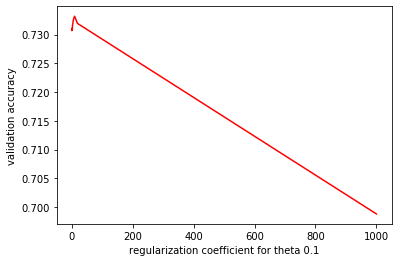

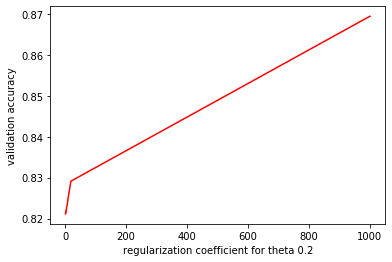

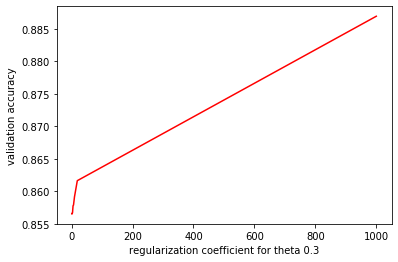

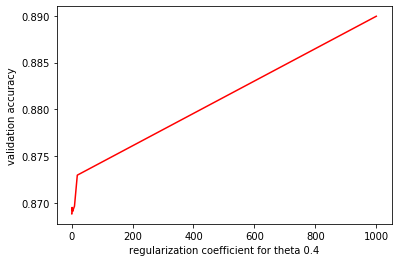

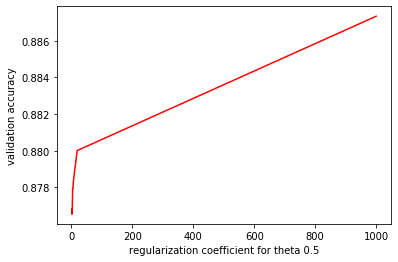

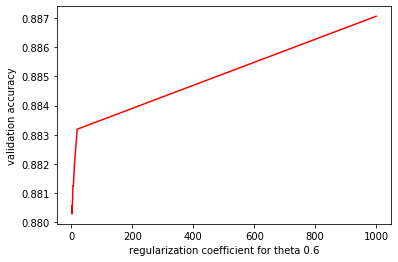

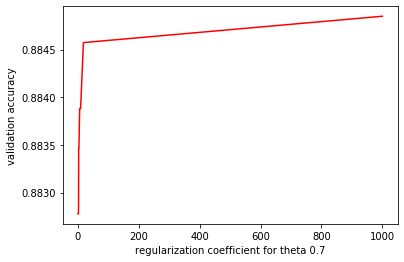

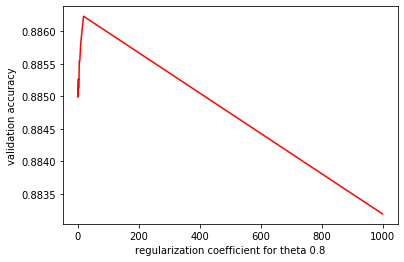

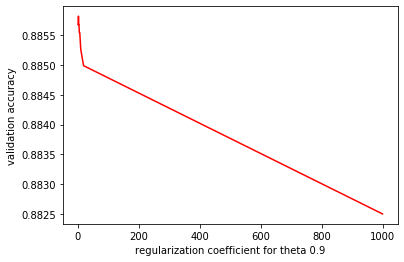

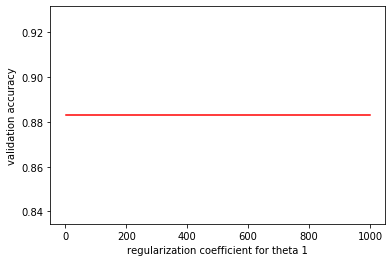

validation accuracy for train2 0.890543996682104
validation accuracy for valid2 0.8873375725739563
validation accuracy for test 0.8882008183125069
3.800519486322004 0.001 0.4 3.861419404897972


In [38]:
# PROBLEM 1, TASK 4 CODE GOES HERE

min_error=9999
best_lambda=0
best_theta=0.5
arrx=[]
arry=[]
plt.xlabel('regularization coefficient')
plt.ylabel('validation accuracy')
for k in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    plt.xlabel('regularization coefficient for theta '+str(k))
    plt.ylabel('validation accuracy')
    for i in np.linspace(0.001,1,20):
        LR = LogisticRegression(penalty='l2',C=i,solver='lbfgs',max_iter=500)
        LR.fit(X,Y)
        y_prob_pred=LR.predict_proba(X2)
        Y_new_predicted=np.array([1 if j[1]>=k else 0 for j in y_prob_pred ])
        Error_new_predicted=log_loss(Y2,Y_new_predicted)
        Accuracy_Validation=accuracy_score(Y2,Y_new_predicted)
        arrx.append(1/i)
        arry.append(Accuracy_Validation)
#        plt.scatter(1/i,Accuracy_Validation,color='red')
#        plt.scatter(i,Error_Validation,color='red')
        if Error_new_predicted<min_error:
            min_error=Error_new_predicted
            best_lambda_inverse=i
            best_theta=k
    plt.plot(arrx,arry,color='red')
    plt.show()
    arrx.clear()
    arry.clear()
    

#train2
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X)
Error_Testing=log_loss(Y,Y_pred_test)
Accuracy_Validation=accuracy_score(Y,Y_pred_test)
print('validation accuracy for train2',Accuracy_Validation)

#valid2
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)  
Y_pred_test=LR.predict(X2)
Error_Testing=log_loss(Y2,Y_pred_test)
Accuracy_Validation=accuracy_score(Y2,Y_pred_test)
print('validation accuracy for valid2',Accuracy_Validation)  
       
    
#test    
LR = LogisticRegression(penalty='l2',C=best_lambda_inverse,solver='lbfgs',max_iter=500)
LR.fit(X,Y)
y_prob_pred_test=LR.predict_proba(X3)  
Y_pred_test=np.array([1 if j[1]>best_theta else 0 for j in y_prob_pred_test ])
Error_Testing=log_loss(Y3,Y_pred_test)
Accuracy_Validation=accuracy_score(Y3,Y_pred_test)
print('validation accuracy for test',Accuracy_Validation)
print(min_error,best_lambda_inverse,best_theta,Error_Testing)

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.



In [ ]:
For Model A:
validation accuracy for train1 0.8203575121879155
validation accuracy for valid1 0.7560543414057885
validation accuracy for test 0.7321685281433152

We can see that as the number of datapoints in the dataset increased, the accuracy all the datasets, 
i.e. train set, valid set and the test set increased.

For Model B:
validation accuracy for train2 0.8999101403193475
validation accuracy for valid2 0.8859552115012441
validation accuracy for test 0.8872055733716687

As we controlled the threshold along with the regularization constant, we can see that the accuracy, 
although marginal, also increased. This happened because we had more controlled environment.

For Model C:
validation accuracy for train2 0.890543996682104
validation accuracy for valid2 0.8873375725739563
validation accuracy for test 0.8882008183125069

In [ ]:
The given dataset is of a balanced class, i.e. the output has almost equal distribution of yes or no. Since this is a
classification problem, taking accuracy_score makes more sence, inplace of any cost function or minimizing log loss function.
accuracy can be defined by the ratio of the number of correct predictions to the total number of input samples.

#--as taken from internet
True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN) – When actual class is yes but predicted class in no.


Accuracy= (TP+TN)/(TP+TN+FP+FN)


Some of the other metrics are:
F1 Score
Log Loss
Root Mean Squared Error
confusion matrix

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

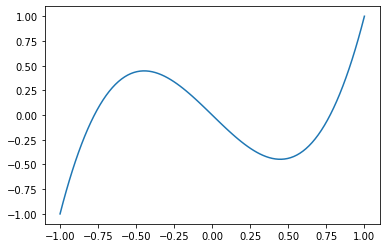

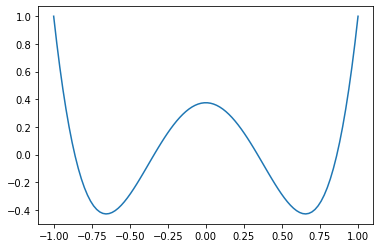

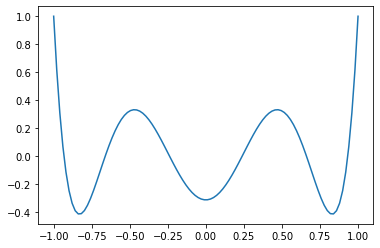

In [41]:
import numpy as np
from scipy.special import legendre
from matplotlib import pyplot as plt
def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    x=np.linspace(low,high,100)
    y_array=[]
    
    
    for i in x:
        y=0
        for j in range(len(w)):
            y=y+(w[j]*(i**j))
        y_array.append(y)
    return x,y_array
#    plt.plot(x,y_array)
#    plt.show()

## TEST CASES (The following lines should plot a function)
x,y=visualize_function(3, -1, 1)
plt.plot(x,y)
plt.show()
x,y=visualize_function(4, -1, 1)
plt.plot(x,y)
plt.show()
x,y=visualize_function(6, -1, 1)
plt.plot(x,y)
plt.show()

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [42]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
    y_array=[]
    w = get_coefficients(degree)
    X_train=np.random.uniform(-1,1,n_train)
    X_train=X_train.reshape(len(X_train),1)
    
    for i in X_train:
        y=0
        for j in range(len(w)):
            y=y+(w[j]*(i**j))
        y=y+np.random.normal(0, sigma)
        y_array.append(y)
        
    y_train=np.asarray(y_array)
#    plt.plot(X_train,y_train)
#    plt.show()
    
    
    
    
    
    y_arr=[]
    w = get_coefficients(degree)
    X_test=np.random.uniform(-1,1,n_test)
    X_test=X_test.reshape(len(X_test),1)
    
    for i in X_test:
        y=0
        for j in range(len(w)):
            y=y+(w[j]*(i**j))
        y=y+np.random.normal(0, sigma)
        y_arr.append(y)
        
    y_test=np.asarray(y_arr)
#    plt.plot(X_test,y_test)
#    plt.show()
    return X_train, y_train, X_test, y_test

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.




The training error and testing error is as follows:
Model A:
    
    Degree 2 Train Error  0.19651652153933294

    Degree 2 Test Error  0.2955928102946982

Model B:


    Degree 10 Train Error  0.10892025974563359

    Degree 10 Test Error  1.5202488356522181

These values change on every run because we have taken datapoints randomly and induced random error.
The input data is genertated from a degree 10 function. Error on training set will be lower than error on testing set in both the cases. This is because, we are training the model using the train set and then predicting on the same set. So, the model memorizes the data. The error on test data will be higher because that data is new for the model.

Model A is of degree 2.
Model B is of degree 10.

Comparing the training error between Model A and Model B, Model A will have higher training error. This is because Model B will overfit the data as it has degree 10.

Also, comparing the test error between Model A and Model B, Model B will have higher testing error. This is because it has considered the random noise and overfit the model on training data. Hence, for the test data error will increase because while reducing error for train set, it reduced bias at the cost of increasing variance. Hence, while predicting the value for the test data, error will increase.

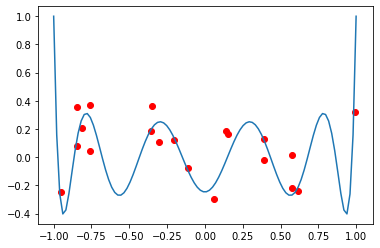

In [43]:
X_train, y_train, X_test, y_test=generate_dataset(10,20,20,0.2)
x,y=visualize_function(10, -1, 1)
plt.plot(x,y)
plt.scatter(X_train,y_train,color='red')
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#  Model A

polyA = PolynomialFeatures(degree=2)
x_A=polyA.fit_transform(X_train)
LRA=LinearRegression().fit(x_A,y_train)
yA_train=LRA.predict(x_A)
Atrain_error=np.sqrt(mean_squared_error(y_train, yA_train))

xtest_A=polyA.fit_transform(X_test)
yA_test=LRA.predict(xtest_A)
Atest_error=np.sqrt(mean_squared_error(y_test, yA_test))

print('Degree 2 Train Error ',Atrain_error)
print('Degree 2 Test Error ',Atest_error)

#  Model B

polyB = PolynomialFeatures(degree=10)
x_B=polyB.fit_transform(X_train)
LRB=LinearRegression().fit(x_B,y_train)
yB_train=LRB.predict(x_B)
Btrain_error=np.sqrt(mean_squared_error(y_train, yB_train))

xtest_B=polyB.fit_transform(X_test)
yB_test=LRB.predict(xtest_B)
Btest_error=np.sqrt(mean_squared_error(y_test, yB_test))

print('Degree 10 Train Error ',Btrain_error)
print('Degree 10 Test Error ',Btest_error)

Degree 2 Train Error  0.19651652153933294
Degree 2 Test Error  0.2955928102946982
Degree 10 Train Error  0.10892025974563359
Degree 10 Test Error  1.5202488356522181


### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

The training error and testing error is as follows:
Model A:
    
    Degree 2 Train Error  4088.2718751320267

    Degree 2 Test Error  22589.05252565519

Model B:


    Degree 10 Train Error  1.7404583225668127

    Degree 10 Test Error  11789.910237909886

These values change on every run because we have taken datapoints randomly and induced random error.
The input data is genertated from a degree 45 function with 0 noise. Error on training set will be lower than error on testing set in both the cases. This is because, we are training the model using the train set and then predicting on the same set. So, the model memorizes the data. The error on test data will be higher because that data is new for the model.

Model A is of degree 2.
Model B is of degree 10.

Comparing the training error between Model A and Model B, Model A will have higher training error. This is because Model B will overfit the data as it has degree 10, while the Model A is of only degree 2. This happens because higher degree function will overfit the datapoints as it is more flexible.

Also, comparing the test error between Model A and Model B, Model A will have higher testing error in this case.
This is the major difference between Task 3 and Task 4.

This is because the random noise in this case is 0. Hence, the degree 10 function will fit the data more accurately and also predict the unknown test data more accurately. 
Hence, for both the training data and test data error will decrease for Model B because while reducing error for train set, it reduced bias and also variance. So. it will also predict more accurately.

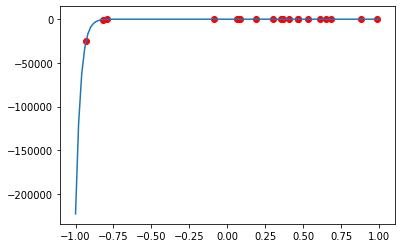

In [45]:
X_train1, y_train1, X_test1, y_test1=generate_dataset(45,20,20,0)
x1,y1=visualize_function(45, -1, 1)
plt.plot(x1,y1)
plt.scatter(X_train1,y_train1,color='red')
plt.show()

In [46]:
polyA2 = PolynomialFeatures(degree=2)
x_A2=polyA2.fit_transform(X_train1)

LRA2=LinearRegression().fit(x_A2,y_train1)
yA_train2=LRA2.predict(x_A2)
Atrain_error2=np.sqrt(mean_squared_error(y_train1, yA_train2))

xtest_A2=polyA2.fit_transform(X_test1)
yA_test2=LRA2.predict(xtest_A2)
Atest_error2=np.sqrt(mean_squared_error(y_test1, yA_test2))

print('Degree 2 Train Error ',Atrain_error2)
print('Degree 2 Test Error ',Atest_error2)

#  Model B

polyB2 = PolynomialFeatures(degree=10)
x_B2=polyB2.fit_transform(X_train1)
LRB2=LinearRegression().fit(x_B2,y_train1)
yB_train2=LRB2.predict(x_B2)
Btrain_error2=np.sqrt(mean_squared_error(y_train1, yB_train2))

xtest_B2=polyB2.fit_transform(X_test1)
yB_test2=LRB2.predict(xtest_B2)
Btest_error2=np.sqrt(mean_squared_error(y_test1, yB_test2))

print('Degree 10 Train Error ',Btrain_error2)
print('Degree 10 Test Error ',Btest_error2)

Degree 2 Train Error  4088.2718751320267
Degree 2 Test Error  22589.05252565519
Degree 10 Train Error  1.7404583225668127
Degree 10 Test Error  11789.910237909886
